In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def createNoise(n):
    r = np.random.normal(0,1,pow(n,2))
    maxr = max(r)
    minr = min(r)
    rnorm = [510*(i-minr)/(maxr-minr)-255 for i in r]
    noise = [[rnorm[(j-1)*n+i] for j in range(n)] for i in range(n)]
    return noise

def isVisible(x):
    n = len(x)
    if n <= 2:
        return True
    return all([x[k] < x[0]+k/(n-1)*(x[n-1]-x[0]) for k in range(1,n-1)])

def visibilityGraph(I):
    n = len(I)
    edges1=[]
    edges2=[]
    for i in range(n):
        for j in range(n):
            for k in range(1,n-j):
                if isVisible([I[i][j+l] for l in range(k+1)]):
                    edges1.append((i,j))
                    edges2.append((i,j+k))
            for k in range(1,n-i):
                if isVisible([I[i+l][j] for l in range(k+1)]):
                    edges1.append((i,j))
                    edges2.append((i+k,j))
            for k in range(1,n-max(i,j)):
                if isVisible([I[i+l][j+l] for l in range(k+1)]):
                    edges1.append((i,j))
                    edges2.append((i+k,j+k))
            for k in range(1,n-max(i,n-j)):
                if isVisible([I[i+l][j-l] for l in range(k+1)]):
                    edges1.append((i,j))
                    edges2.append((i+k,j-k))
            # Otras diagonales
            # for k in range(1,min(n-i,floor(n-j/2))):
            #    if isVisible(I[][])
    return edges1, edges2

def weightMat(n,edges1,edges2):
    M = [[0] * n for _ in range(n)]
    edges = edges1 + edges2
    for (i,j) in edges:
        M[i][j] += 1
    return M

def addNoise(image,noise,coeff):
    return np.clip([[z+coeff*w for (z,w) in zip(x,y)] for (x, y) in zip(image,noise)],0,255)

def flatten(xss):
    return [x for xs in xss for x in xs]

Text(0.5, 1.0, 'ruido')

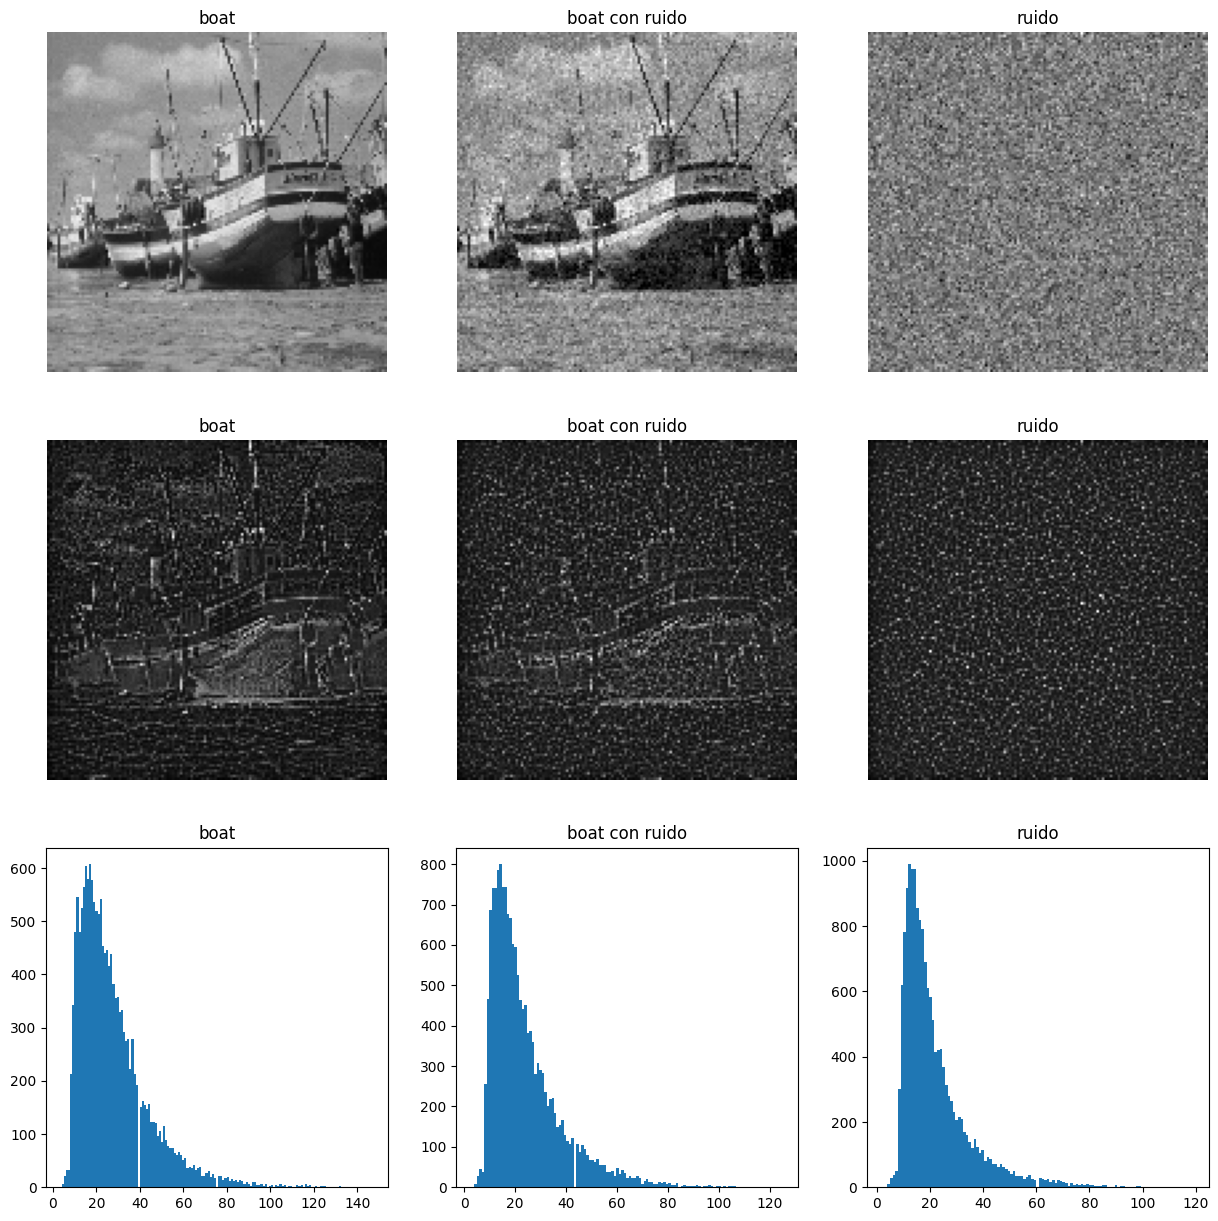

In [4]:
boatIm = Image.open('boat128.png').convert("L")
boat = np.array(boatIm).tolist()
n = len(boat)
noise = createNoise(n)
noiseCoeff = 0.33
boatNoise = addNoise(boat,noise,noiseCoeff)

boat1,boat2 = visibilityGraph(boat)
boatNoise1,boatNoise2 = visibilityGraph(boatNoise)
noise1,noise2 = visibilityGraph(noise)

boatMat = weightMat(n,boat1,boat2)
boatNoiseMat = weightMat(n,boatNoise1,boatNoise2)
noiseMat = weightMat(n,noise1,noise2)

boatHist = flatten(boatMat)
boatNoiseHist = flatten(boatNoiseMat)
noiseHist = flatten(noiseMat)

f, ((im1,im2,im3),(ivg1,ivg2,ivg3),(hist1,hist2,hist3)) = plt.subplots(3, 3)
f.set_figwidth(15)
f.set_figheight(15)

im1.imshow(boat, cmap='gray',vmin=0,vmax=255)
im1.set_title('boat')
im1.axis('off')

im2.imshow(boatNoise, cmap='gray',vmin=0,vmax=255)
im2.set_title('boat con ruido')
im2.axis('off')

im3.imshow(noise, cmap='gray',vmin=-255,vmax=255)
im3.set_title('ruido')
im3.axis('off')

ivg1.imshow(boatMat, cmap='gray')
ivg1.set_title('boat')
ivg1.axis('off')

ivg2.imshow(boatNoiseMat, cmap='gray')
ivg2.set_title('boat con ruido')
ivg2.axis('off')

ivg3.imshow(noiseMat, cmap='gray')
ivg3.set_title('ruido')
ivg3.axis('off')

hist1.hist(boatHist,bins=max(boatHist))
hist1.set_title('boat')

hist2.hist(boatNoiseHist,bins=max(boatNoiseHist))
hist2.set_title('boat con ruido')

hist3.hist(noiseHist,bins=max(noiseHist))
hist3.set_title('ruido')

Text(0.5, 1.0, 'ruido')

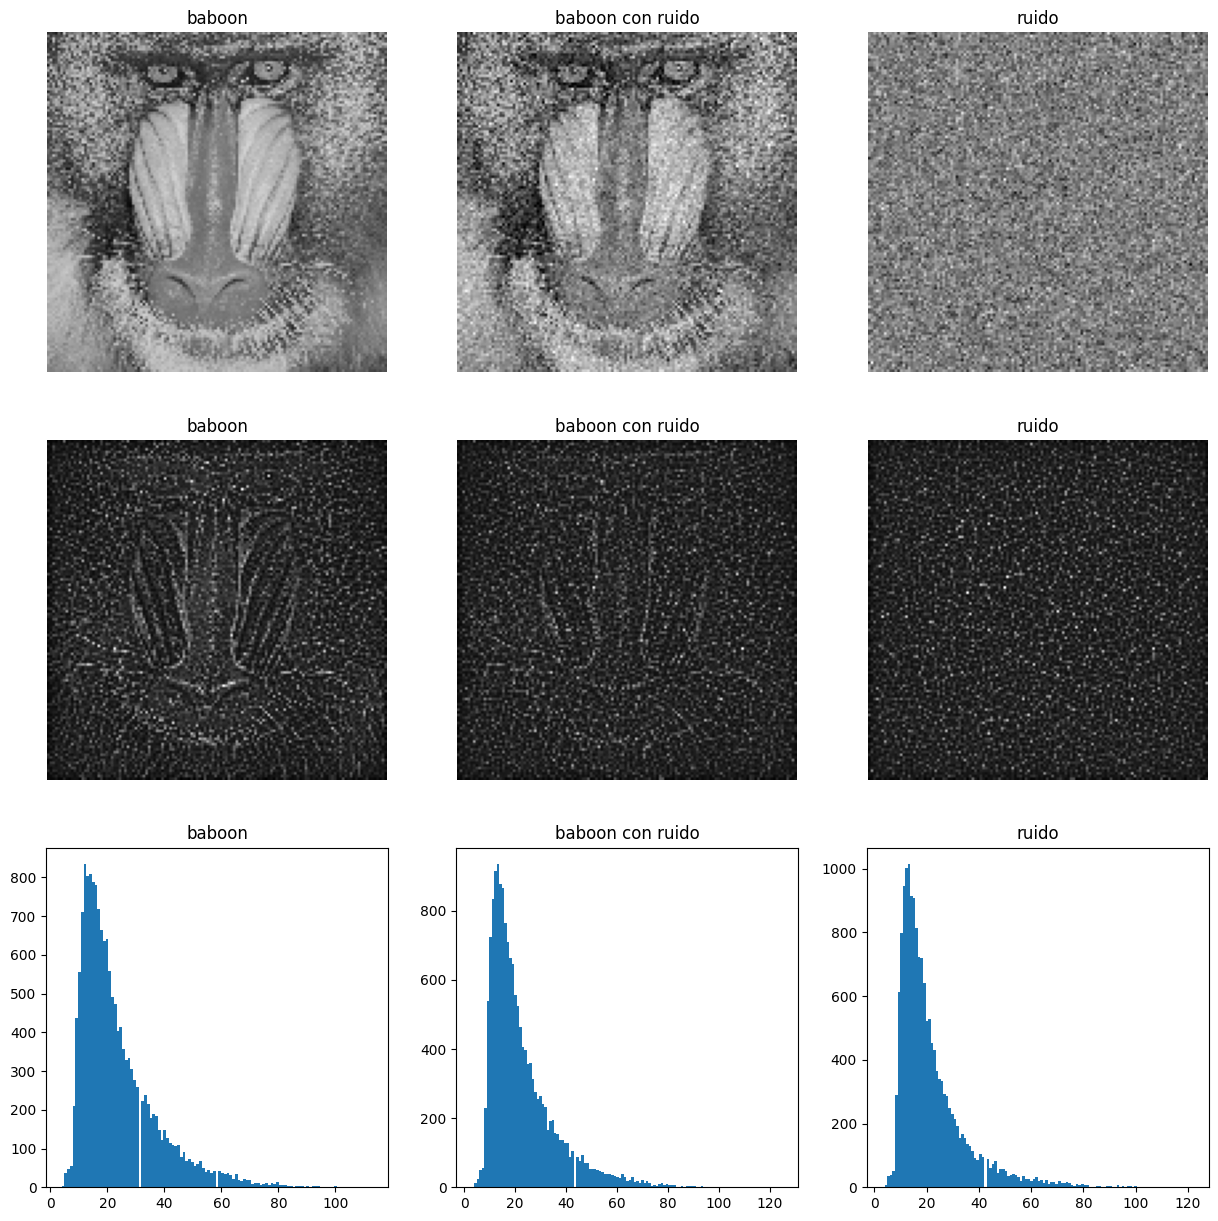

In [5]:
baboonIm = Image.open('baboon128.png').convert("L")
baboon = np.array(baboonIm).tolist()
n = len(baboon)
noise = createNoise(n)
noiseCoeff = 0.33
baboonNoise = addNoise(baboon,noise,noiseCoeff)

baboon1,baboon2 = visibilityGraph(baboon)
baboonNoise1,baboonNoise2 = visibilityGraph(baboonNoise)
noise1,noise2 = visibilityGraph(noise)

baboonMat = weightMat(n,baboon1,baboon2)
baboonNoiseMat = weightMat(n,baboonNoise1,baboonNoise2)
noiseMat = weightMat(n,noise1,noise2)

baboonHist = flatten(baboonMat)
baboonNoiseHist = flatten(baboonNoiseMat)
noiseHist = flatten(noiseMat)

f, ((im1,im2,im3),(ivg1,ivg2,ivg3),(hist1,hist2,hist3)) = plt.subplots(3, 3)
f.set_figwidth(15)
f.set_figheight(15)

im1.imshow(baboon, cmap='gray',vmin=0,vmax=255)
im1.set_title('baboon')
im1.axis('off')

im2.imshow(baboonNoise, cmap='gray',vmin=0,vmax=255)
im2.set_title('baboon con ruido')
im2.axis('off')

im3.imshow(noise, cmap='gray',vmin=-255,vmax=255)
im3.set_title('ruido')
im3.axis('off')

ivg1.imshow(baboonMat, cmap='gray')
ivg1.set_title('baboon')
ivg1.axis('off')

ivg2.imshow(baboonNoiseMat, cmap='gray')
ivg2.set_title('baboon con ruido')
ivg2.axis('off')

ivg3.imshow(noiseMat, cmap='gray')
ivg3.set_title('ruido')
ivg3.axis('off')

hist1.hist(baboonHist,bins=max(baboonHist))
hist1.set_title('baboon')

hist2.hist(baboonNoiseHist,bins=max(baboonNoiseHist))
hist2.set_title('baboon con ruido')

hist3.hist(noiseHist,bins=max(noiseHist))
hist3.set_title('ruido')

Text(0.5, 1.0, 'ruido')

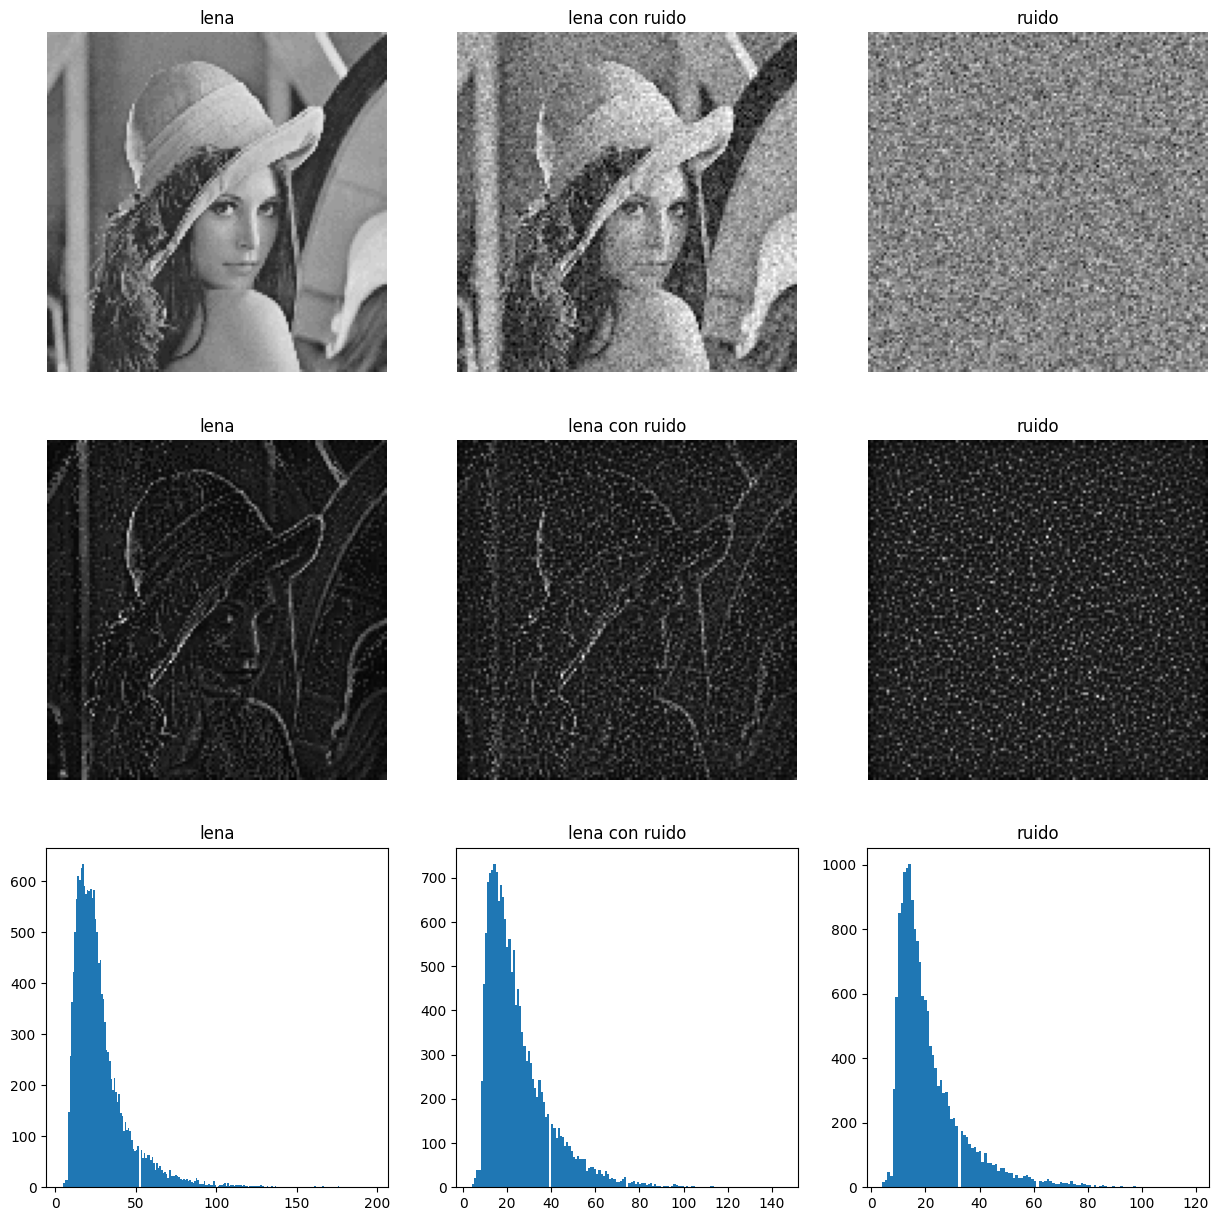

In [6]:
lenaIm = Image.open('lena128.png').convert("L")
lena = np.array(lenaIm).tolist()
n = len(lena)
noise = createNoise(n)
noiseCoeff = 0.33
lenaNoise = addNoise(lena,noise,noiseCoeff)

lena1,lena2 = visibilityGraph(lena)
lenaNoise1,lenaNoise2 = visibilityGraph(lenaNoise)
noise1,noise2 = visibilityGraph(noise)

lenaMat = weightMat(n,lena1,lena2)
lenaNoiseMat = weightMat(n,lenaNoise1,lenaNoise2)
noiseMat = weightMat(n,noise1,noise2)

lenaHist = flatten(lenaMat)
lenaNoiseHist = flatten(lenaNoiseMat)
noiseHist = flatten(noiseMat)

f, ((im1,im2,im3),(ivg1,ivg2,ivg3),(hist1,hist2,hist3)) = plt.subplots(3, 3)
f.set_figwidth(15)
f.set_figheight(15)

im1.imshow(lena, cmap='gray',vmin=0,vmax=255)
im1.set_title('lena')
im1.axis('off')

im2.imshow(lenaNoise, cmap='gray',vmin=0,vmax=255)
im2.set_title('lena con ruido')
im2.axis('off')

im3.imshow(noise, cmap='gray',vmin=-255,vmax=255)
im3.set_title('ruido')
im3.axis('off')

ivg1.imshow(lenaMat, cmap='gray')
ivg1.set_title('lena')
ivg1.axis('off')

ivg2.imshow(lenaNoiseMat, cmap='gray')
ivg2.set_title('lena con ruido')
ivg2.axis('off')

ivg3.imshow(noiseMat, cmap='gray')
ivg3.set_title('ruido')
ivg3.axis('off')

hist1.hist(lenaHist,bins=max(lenaHist))
hist1.set_title('lena')

hist2.hist(lenaNoiseHist,bins=max(lenaNoiseHist))
hist2.set_title('lena con ruido')

hist3.hist(noiseHist,bins=max(noiseHist))
hist3.set_title('ruido')

Text(0.5, 1.0, 'ruido')

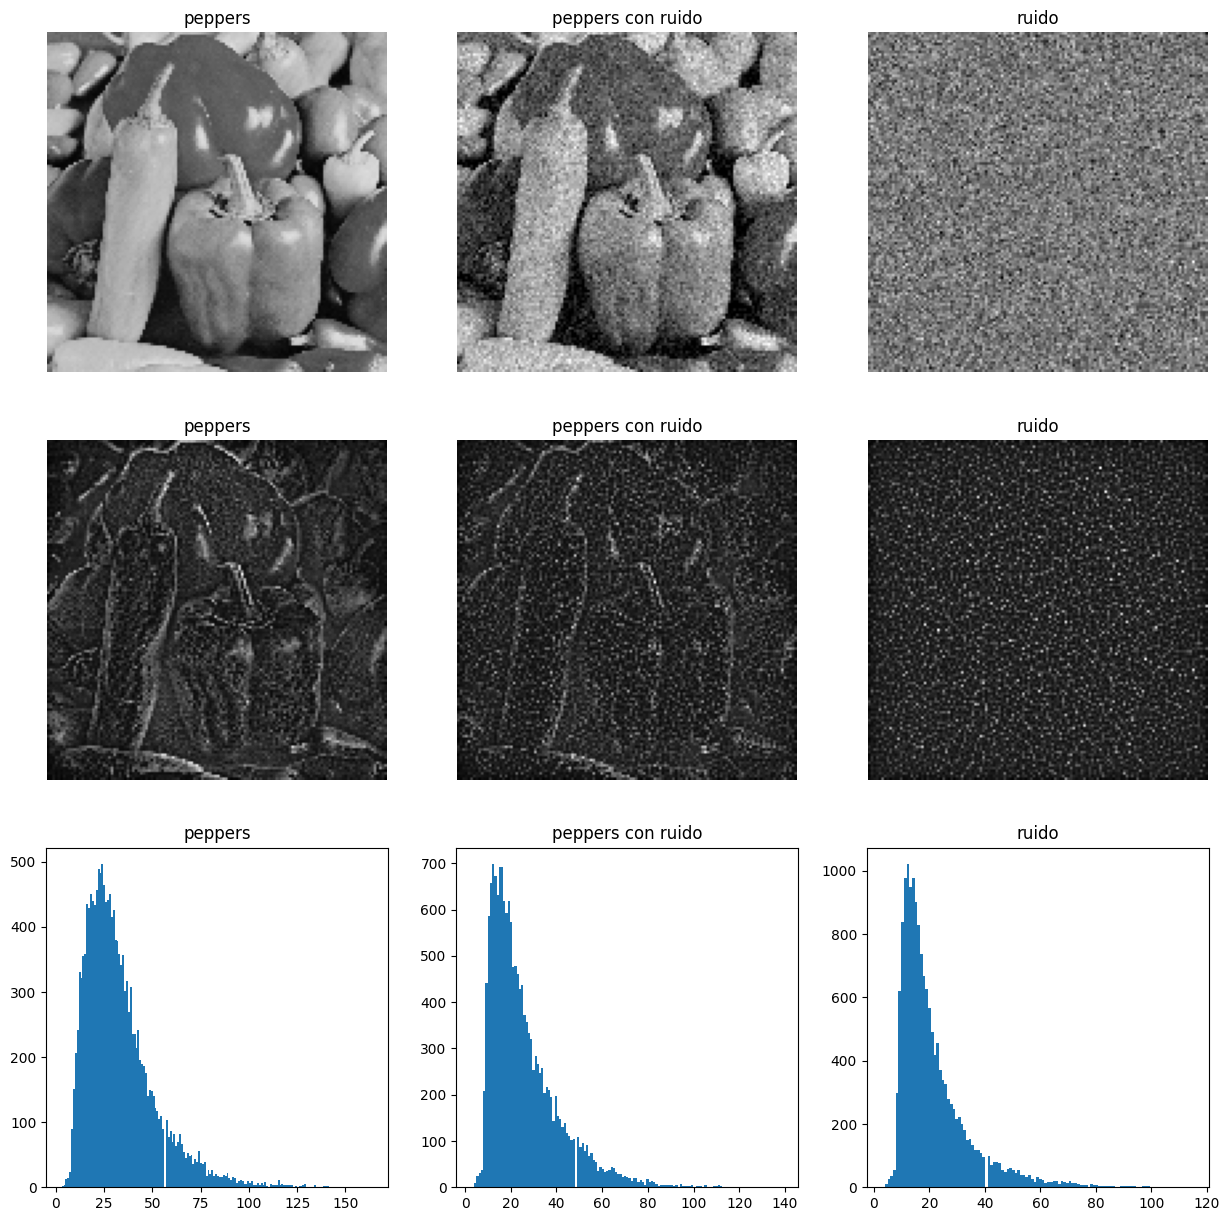

In [7]:
peppersIm = Image.open('peppers128.png').convert("L")
peppers = np.array(peppersIm).tolist()
n = len(peppers)
noise = createNoise(n)
noiseCoeff = 0.33
peppersNoise = addNoise(peppers,noise,noiseCoeff)

peppers1,peppers2 = visibilityGraph(peppers)
peppersNoise1,peppersNoise2 = visibilityGraph(peppersNoise)
noise1,noise2 = visibilityGraph(noise)

peppersMat = weightMat(n,peppers1,peppers2)
peppersNoiseMat = weightMat(n,peppersNoise1,peppersNoise2)
noiseMat = weightMat(n,noise1,noise2)

peppersHist = flatten(peppersMat)
peppersNoiseHist = flatten(peppersNoiseMat)
noiseHist = flatten(noiseMat)

f, ((im1,im2,im3),(ivg1,ivg2,ivg3),(hist1,hist2,hist3)) = plt.subplots(3, 3)
f.set_figwidth(15)
f.set_figheight(15)

im1.imshow(peppers, cmap='gray',vmin=0,vmax=255)
im1.set_title('peppers')
im1.axis('off')

im2.imshow(peppersNoise, cmap='gray',vmin=0,vmax=255)
im2.set_title('peppers con ruido')
im2.axis('off')

im3.imshow(noise, cmap='gray',vmin=-255,vmax=255)
im3.set_title('ruido')
im3.axis('off')

ivg1.imshow(peppersMat, cmap='gray')
ivg1.set_title('peppers')
ivg1.axis('off')

ivg2.imshow(peppersNoiseMat, cmap='gray')
ivg2.set_title('peppers con ruido')
ivg2.axis('off')

ivg3.imshow(noiseMat, cmap='gray')
ivg3.set_title('ruido')
ivg3.axis('off')

hist1.hist(peppersHist,bins=max(peppersHist))
hist1.set_title('peppers')

hist2.hist(peppersNoiseHist,bins=max(peppersNoiseHist))
hist2.set_title('peppers con ruido')

hist3.hist(noiseHist,bins=max(noiseHist))
hist3.set_title('ruido')

Text(0.5, 1.0, 'ruido')

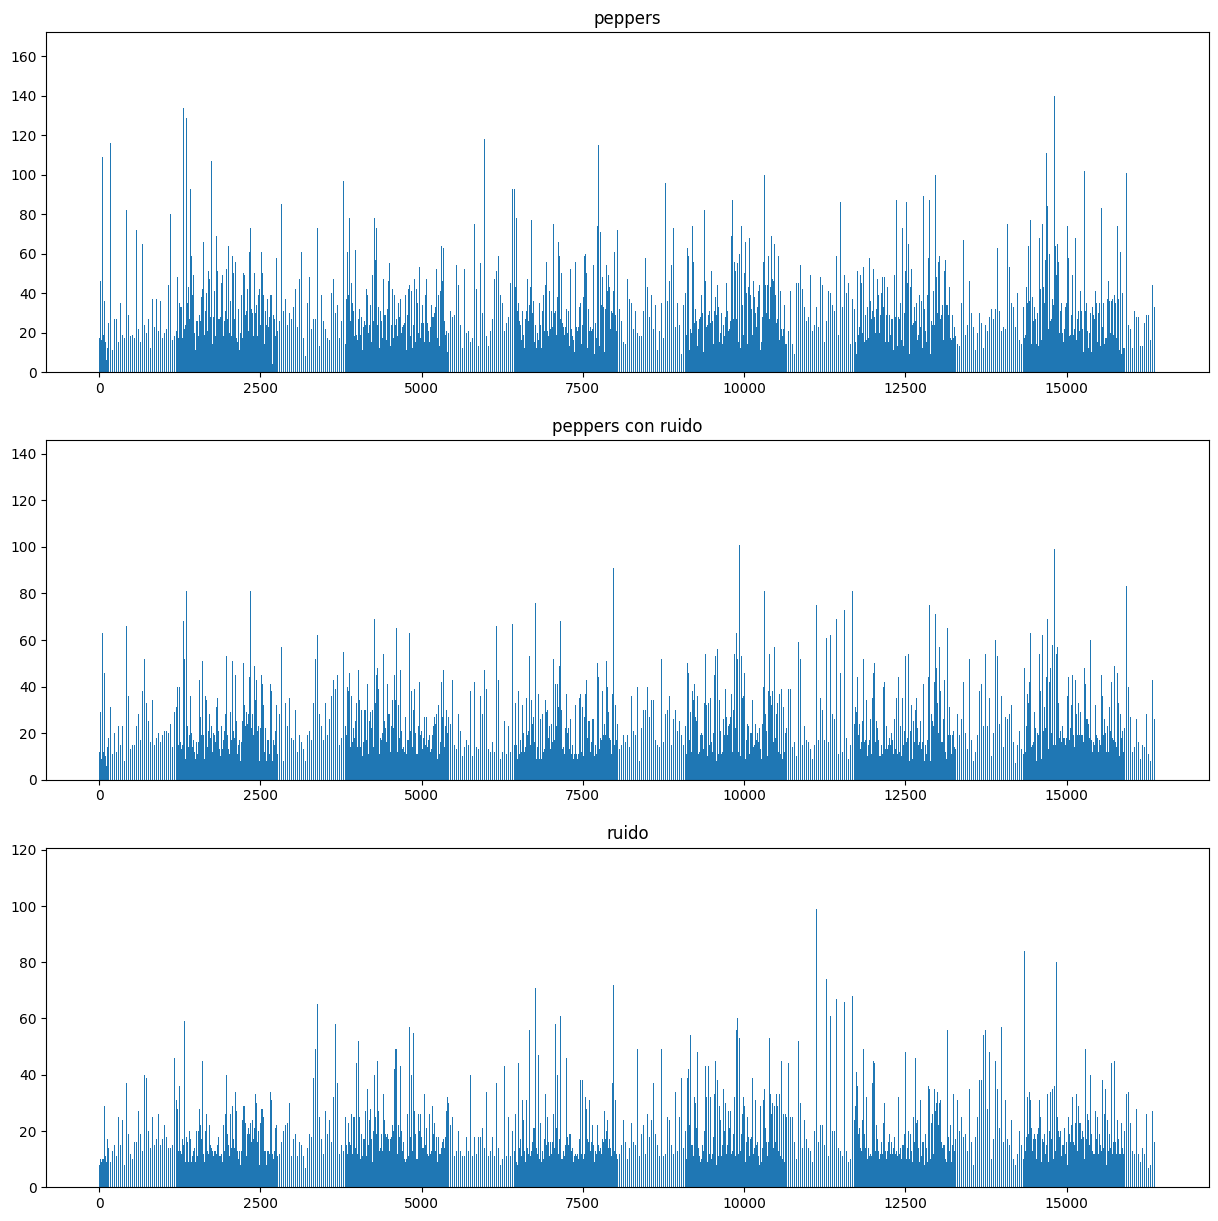

In [22]:
f, (p1,p2,p3) = plt.subplots(3, 1)
f.set_figwidth(15)
f.set_figheight(15)

p1.bar(np.arange(len(peppersHist)), peppersHist)
p1.set_title('peppers')

p2.bar(np.arange(len(peppersNoiseHist)), peppersNoiseHist)
p2.set_title('peppers con ruido')

p3.bar(np.arange(len(noiseHist)), noiseHist)
p3.set_title('ruido')